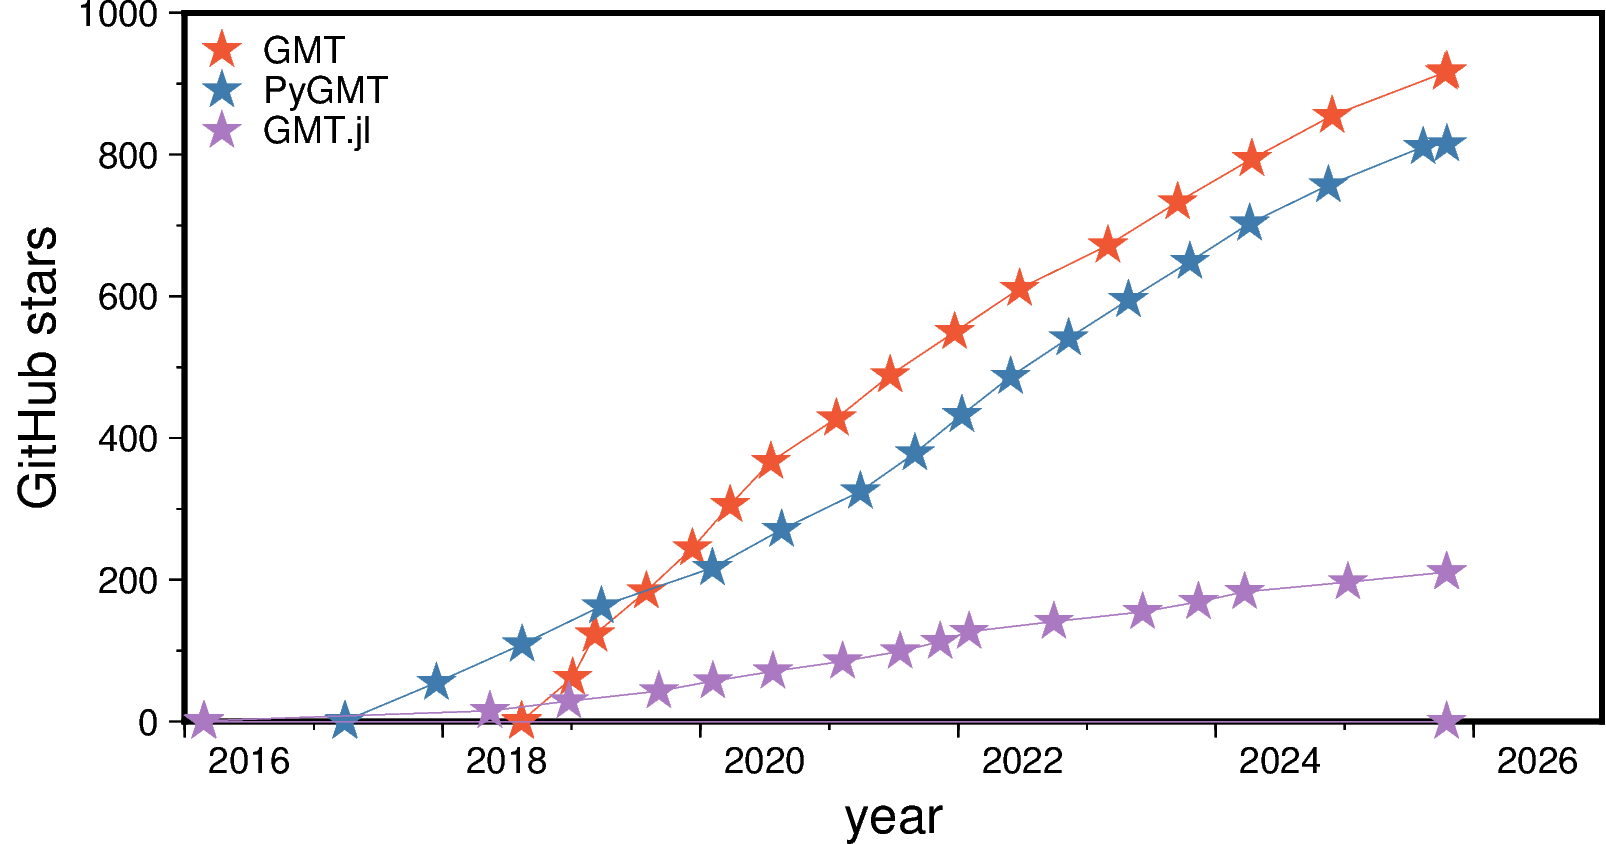

In [1]:
import datetime

import numpy as np
import pandas as pd
import pygmt

fig = pygmt.Figure()

fig.basemap(
    projection="X12c/6c",
    region=[datetime.date(2016, 1, 1), datetime.date(2026, 12, 31), 0, 1000],
    frame=["x+lyear", "y+lGitHub stars"],
)

for csvfile, color, label in zip(
    ["star_history_20251017_gmt.csv", "star_history_20251017_pygmt.csv", "star_history_20251017_gmtjl.csv"],
    ["238/86/52", "63/124/173", "170/121/193"],
    ["GMT", "PyGMT", "GMT.jl"],
): 
    df = pd.read_csv(csvfile)
    df["Date"] = df["Date"].str.split(" \\(").str[0]
    df["Date"] = pd.to_datetime(df["Date"], format="%a %b %d %Y %H:%M:%S GMT%z", utc=True)

    fig.plot(x=df["Date"], y=df["Stars"], pen=color, no_clip=True)
    fig.plot(x=df["Date"], y=df["Stars"], fill=color, style="a0.35c", no_clip=True, label=label)

fig.legend(position="jTL")

fig.show()